In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [17]:
df=pd.read_csv(r'D:\Datasets\detect_dataset.csv')

In [3]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [4]:
df.isna()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
11996,False,False,False,False,False,False,False,True,True
11997,False,False,False,False,False,False,False,True,True
11998,False,False,False,False,False,False,False,True,True
11999,False,False,False,False,False,False,False,True,True


In [5]:
df=df.drop(['Unnamed: 7','Unnamed: 8'], axis=1)

In [6]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ia', ylabel='Va'>

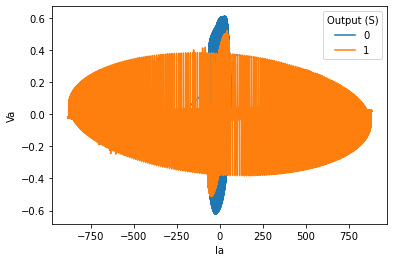

In [45]:
sns.lineplot(df['Ia'],df['Va'],hue=df['Output (S)'])


In [7]:
df['Output (S)'].head()


0    0
1    0
2    0
3    0
4    0
Name: Output (S), dtype: int64

In [18]:
X=df.drop(columns=['Output (S)'])
y=df['Output (S)']

In [23]:
df2.corrwith(df,axis=0)

Ia            1.0
Ib            1.0
Ic            1.0
Va            1.0
Vb            1.0
Vc            1.0
Output (S)    NaN
dtype: float64

ValueError: cannot reshape array of size 12001 into shape (0,1)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ic', ylabel='Vc'>

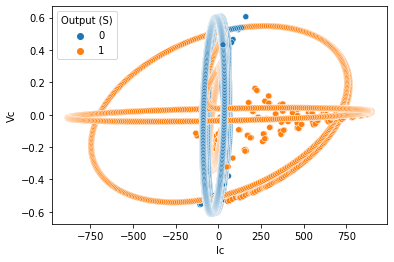

In [38]:
import seaborn as sns
sns.scatterplot(df['Ic'],df['Vc'],hue=df['Output (S)'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [29]:
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)
y_train=y_train.fillna(0)
y_test=y_test.fillna(0)

In [30]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [31]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.5823986194995686

<AxesSubplot:>

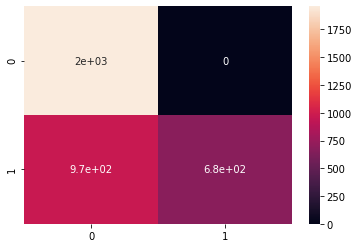

In [32]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [27]:
df['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# DECISION TREE


In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [34]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = decision_tree.predict(X_test)

<AxesSubplot:>

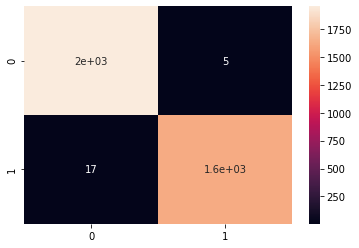

In [36]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [37]:
accuracy_score(y_test, y_pred)

0.9938905859483477

# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

In [39]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10)

In [40]:
y_pred = random_forest.predict(X_test)

In [41]:
random_forest.score(X_test,y_test)

0.9955567897806165

<AxesSubplot:>

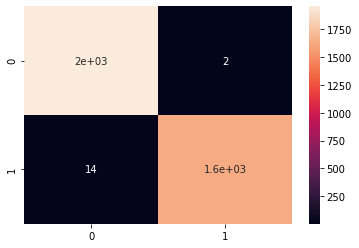

In [42]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True)

In [43]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 10)
print(" Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

 Accuracy: 0.996 (+/- 0.006)
